In [6]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [32]:
import sqlite3

con = sqlite3.connect("../db.sqlite3")

query = """
SELECT restaurant_orderitem.order_id, restaurant_orderitem.quantity, restaurant_order.datetime, restaurant_product.price, restaurant_product.name
FROM restaurant_orderitem
INNER JOIN restaurant_order
ON restaurant_orderitem.order_id = restaurant_order.id
INNER JOIN restaurant_product
ON restaurant_orderitem.product_id = restaurant_product.id
"""

df = pd.read_sql_query(query, con)

df.to_csv("restaurant.csv", index=False)

con.close()

print("Data was successfully extracted and saved to restaurant.csv.")

def load_and_preprocess_data(csv_path):
    df = pd.read_csv(csv_path)
    df["quantity"] = df["quantity"].astype("int8")
    df["datetime"] = pd.to_datetime(df["datetime"])
    return df

restaurant = load_and_preprocess_data("restaurant.csv")

print(restaurant.info())
print(restaurant.head())


Data was successfully extracted and saved to restaurant.csv.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  74818 non-null  int64         
 1   quantity  74818 non-null  int8          
 2   datetime  74818 non-null  datetime64[ns]
 3   price     74818 non-null  float64       
 4   name      74818 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), int8(1), object(1)
memory usage: 2.4+ MB
None
   order_id  quantity            datetime  price                 name
0         1         2 2019-08-03 20:25:00   0.80        Plain Papadum
1         1         1 2019-08-03 20:25:00  12.95     King Prawn Balti
2         1         1 2019-08-03 20:25:00   2.95          Garlic Naan
3         1         1 2019-08-03 20:25:00   3.95        Mushroom Rice
4         1         1 2019-08-03 20:25:00   8.95  Paneer Tikka M

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

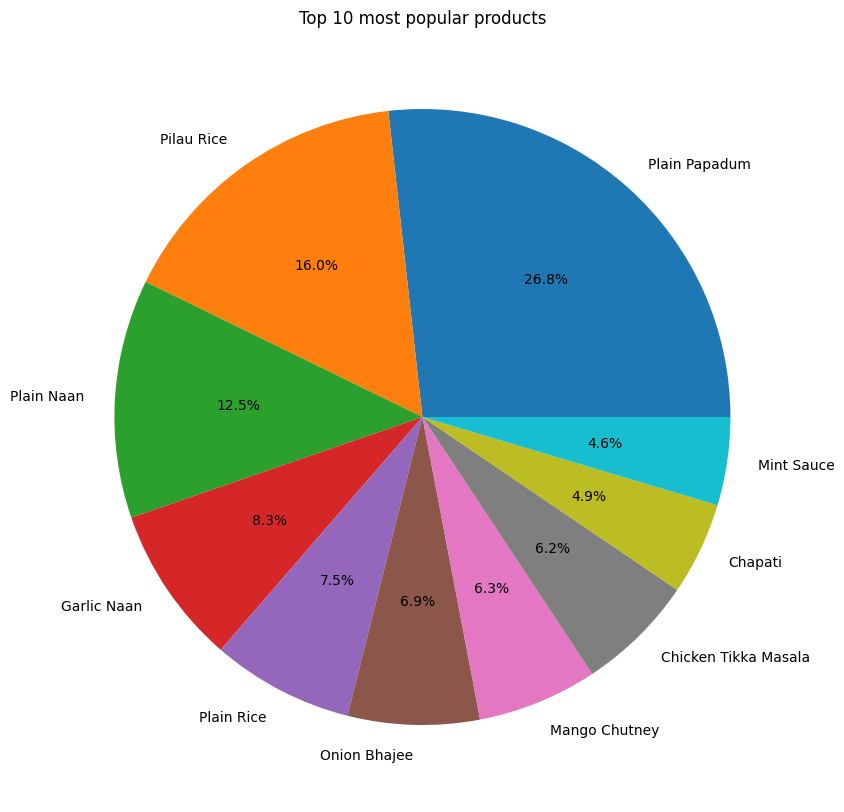

In [33]:
import matplotlib.pyplot as plt

grouped_df = df.groupby("name")["quantity"].sum().reset_index()

top_products = grouped_df.sort_values("quantity", ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.pie(top_products["quantity"], labels=top_products["name"], autopct="%1.1f%%")
plt.title("Top 10 most popular products")
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

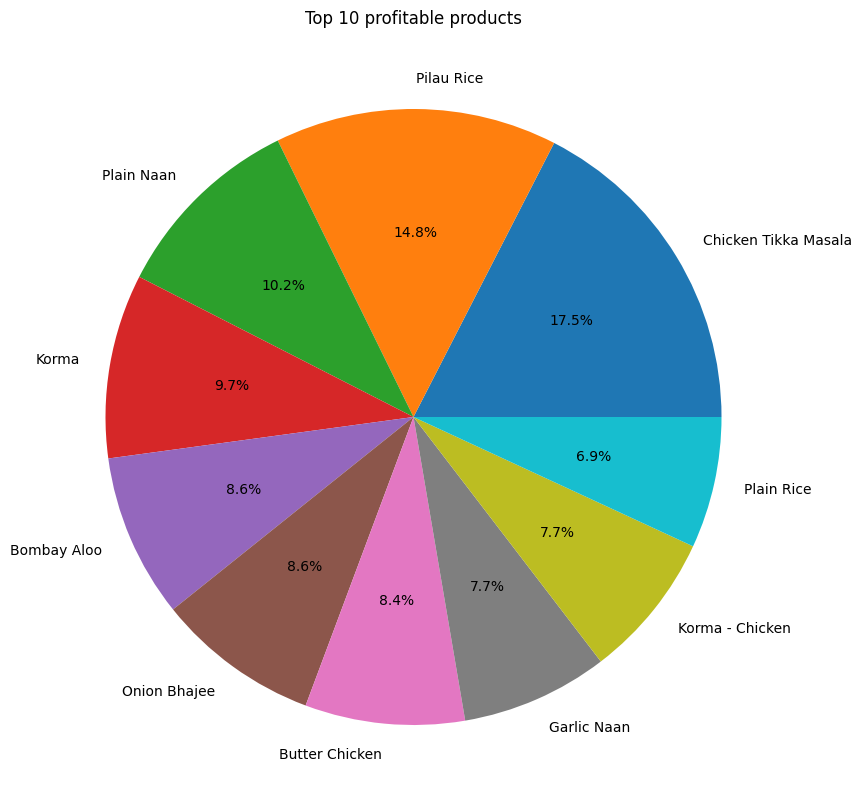

In [34]:
df["item_price"] = df["quantity"] * df["price"]

grouped_df = df.groupby("name")["item_price"].sum().reset_index()

top_profitable_products = grouped_df.sort_values("item_price", ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.pie(top_profitable_products["item_price"], labels=top_profitable_products["name"], autopct="%1.1f%%")
plt.title("Top 10 profitable products")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

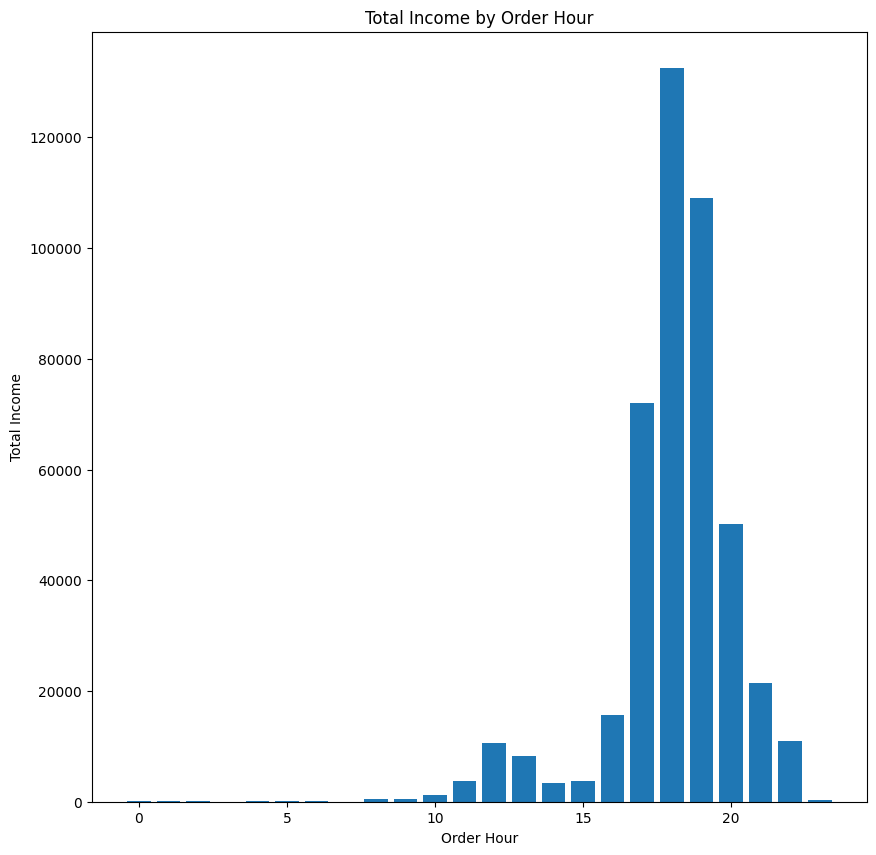

In [35]:

df["datetime"] = pd.to_datetime(df["datetime"])

df["order_hour"] = df["datetime"].dt.hour

income_by_hour = df.groupby("order_hour")["item_price"].sum().reset_index()

plt.figure(figsize=(10, 10))
plt.bar(income_by_hour["order_hour"], income_by_hour["item_price"])
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Total Income by Order Hour")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

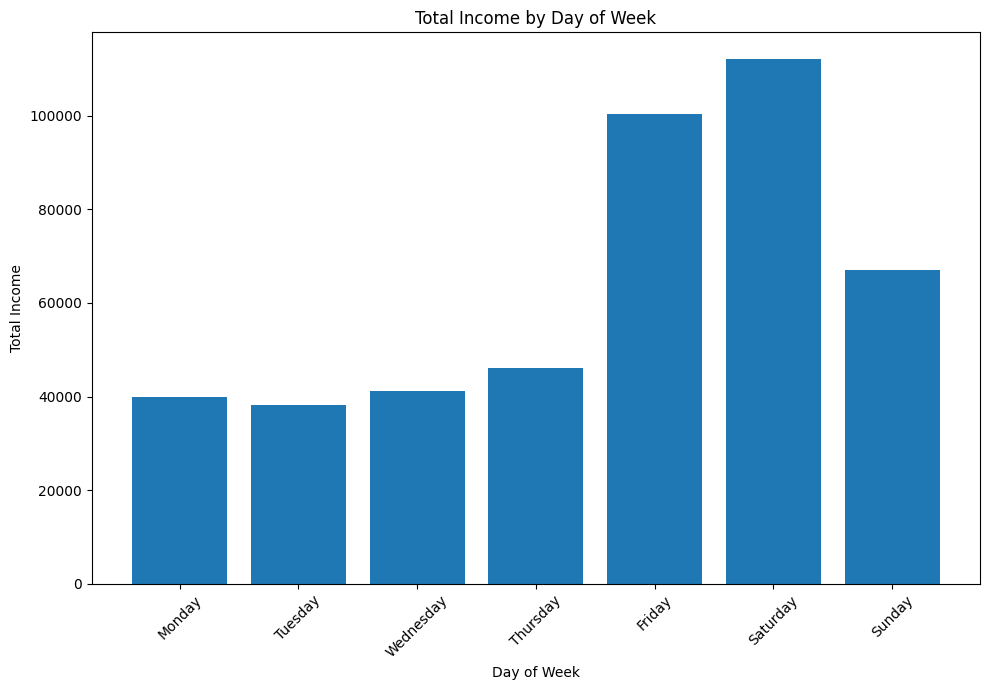

In [36]:
df["day_of_week"] = df["datetime"].dt.dayofweek

income_by_day = df.groupby("day_of_week")["item_price"].sum().reset_index()

days_dict = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
income_by_day["day_of_week"] = income_by_day["day_of_week"].map(days_dict)

plt.figure(figsize=(10, 7))
plt.bar(income_by_day["day_of_week"], income_by_day["item_price"])
plt.xlabel("Day of Week")
plt.ylabel("Total Income")
plt.title("Total Income by Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()